### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from category_encoders import BinaryEncoder
from sklearn.preprocessing import power_transform, OrdinalEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel(r'C:\Users\Krunal\Internship Projects\Car Price Prediction\data files\cars.xlsx')
data.head()

,price,year,fuel,trans,mile,color,owner,engine,seating,location,Body,make,model
0,422000.0,2019,Petrol,Manual,24230,White,1st Owner,998,5,Ahmedabad,hatchback,Maruti Suzuki,S-Presso
1,585000.0,2018,Diesel,Manual,31694,White,1st Owner,1248,5,Ahmedabad,hatchback,Maruti Suzuki,Swift
2,610000.0,2017,Petrol,Manual,49072,White,1st Owner,1197,5,Ahmedabad,hatchback,Maruti Suzuki,Baleno
3,399000.0,2013,Diesel,Manual,72301,White,1st Owner,1248,5,Ahmedabad,hatchback,Maruti Suzuki,Swift
4,600000.0,2019,Petrol,Manual,21060,White,1st Owner,1197,5,Ahmedabad,hatchback,Maruti Suzuki,Swift


### Checking for number of categories available within a feature

In [3]:
data['year'].unique()

array([2019, 2018, 2017, 2013, 2016, 2014, 2020, 2011, 2015, 2012, 2009,
       2010, 2008, 2021, 2003, 2006, 2007, 2005, 2004, 1998, 2002, 1991,
       1996, 1995, 1994, 2001, 2000, 1999], dtype=int64)

In [4]:
data['fuel'].value_counts()

Diesel                 3262
Petrol                 2783
Diesel + Diesel         227
Petrol + Petrol         193
Petrol + CNG             23
Petrol + Cng             21
LPG + Lpg                19
CNG + Cng                12
Diesel + CNG             11
Petrol + LPG             10
CNG + CNG                 5
Hybrid                    5
LPG + LPG                 4
Petrol + Diesel           4
Petrol + Lpg              4
CNG                       2
LPG + Petrol+Lpg          2
Hybrid + Hybrid(Ele       1
Diesel + Petrol           1
CNG + Petrol+Cng          1
Hybrid + Petrol           1
Name: fuel, dtype: int64

### I can see that there are number of repeated categories in a dataset. Hence i"m combining them wherever they belong respectively

In [5]:
data['fuel'] = np.where(data['fuel'].isin(['Hybrid + Hybrid(Ele','Hybrid + Petrol']),'Hybrid', data['fuel'])

In [6]:
data['fuel'] = np.where(data['fuel'].isin(['CNG + Petrol+Cng','Diesel + Petrol','LPG + Petrol+Lpg','Petrol + Diesel']),'Petrol', data['fuel'])

In [7]:
data['fuel'] = np.where(data['fuel']=='Petrol + Lpg','Petrol + LPG',
                       np.where(data['fuel'].isin(['CNG + CNG','CNG + Cng']),'CNG',data['fuel']))

In [8]:
data['fuel'] = np.where(data['fuel'].isin(['LPG + LPG','LPG + Lpg']),'LPG',
                       np.where(data['fuel']=='Petrol + Cng','Petrol + CNG',
                               np.where(data['fuel']=='Diesel + Diesel','Diesel',
                                       np.where(data['fuel']=='Petrol + Petrol','Petrol',data['fuel']))))

In [9]:
data['fuel'] = np.where(data['fuel']=='Petrol + LPG','LPG',
                       np.where(data['fuel']=='Diesel + CNG','CNG', data['fuel']))

In [10]:
data['trans'].value_counts()

Manual       4429
Automatic    2142
KA02            3
KA04            3
TS08            3
KA01            2
KA03            2
KA53            2
KA05            1
KA50            1
AP36            1
AP23            1
TS10            1
Name: trans, dtype: int64

In [11]:
data['trans'] = np.where(data['trans'].isin(['KA02','KA04','TS08','KA01','KA03','KA53','KA05','KA50','AP36','AP23','TS10']),'Manual',data['trans'])

In [12]:
data['owner'].unique()

array(['1st Owner', '2nd Owner', '3rd Owner', 'First', 'Second',
       'UnRegistered Car', 'Third', 'Fourth', '4 or More'], dtype=object)

In [13]:
data['owner'] = np.where(data['owner']=='1st Owner','First', np.where(data['owner']=='2nd Owner','Second',
                                                                     np.where(data['owner']=='3rd Owner','Third',
                                                                             np.where(data['owner']=='4 or More','Fourth',data['owner']))))

In [14]:
data['location'].unique()

array(['Ahmedabad', 'Bangalore', 'Hyderabad', 'Gandhi Nagar', 'Pune',
       'Chennai', 'Poonamallee', 'Coimbatore', 'Dehradun', 'Kolkata',
       'Mumbai', 'Tiruppur', 'Secunderabad', 'Jaipur', 'Karnal', 'Delhi',
       'Kochi', 'Kozhikode', 'Ernakulam', 'Kottayam', 'Pathanamthitta',
       'Kollam', 'Thiruvananthapuram'], dtype=object)

In [15]:
data['Body'].unique()

array(['hatchback', 'SUV', 'sedan', 'minivan', 'coupe/convertible'],
      dtype=object)

In [16]:
data['make'].unique()

array(['Maruti Suzuki', 'Hyundai', 'Honda', 'Toyota', 'Nissan', 'Ford',
       'Renault', 'Mahindra', 'Tata', 'Volkswagen', 'Kia', 'MG', 'Skoda',
       'Datsun', 'Mercedes-Benz', 'Fiat', 'Volvo', 'Chevrolet',
       'Land Rover', 'Audi', 'Porsche', 'Ssangyong', 'Jeep', 'BMW',
       'Mitsubishi', 'Jaguar', 'MINI', 'DC', 'Aston Martin', 'Maserati',
       'Isuzu', 'Bentley', 'Opel', 'Lexus', 'Mahindra-Renault',
       'Force Motors', 'Lamborghini', 'Ferrari', 'Rolls-Royce'],
      dtype=object)

### Checking for the data type

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6591 entries, 0 to 6590
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     6591 non-null   float64
 1   year      6591 non-null   int64  
 2   fuel      6591 non-null   object 
 3   trans     6591 non-null   object 
 4   mile      6591 non-null   int64  
 5   color     6591 non-null   object 
 6   owner     6591 non-null   object 
 7   engine    6591 non-null   int64  
 8   seating   6591 non-null   int64  
 9   location  6591 non-null   object 
 10  Body      6591 non-null   object 
 11  make      6591 non-null   object 
 12  model     6591 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 669.5+ KB


### The car prices increase with increase in the year. The newer the car's model the higher the price

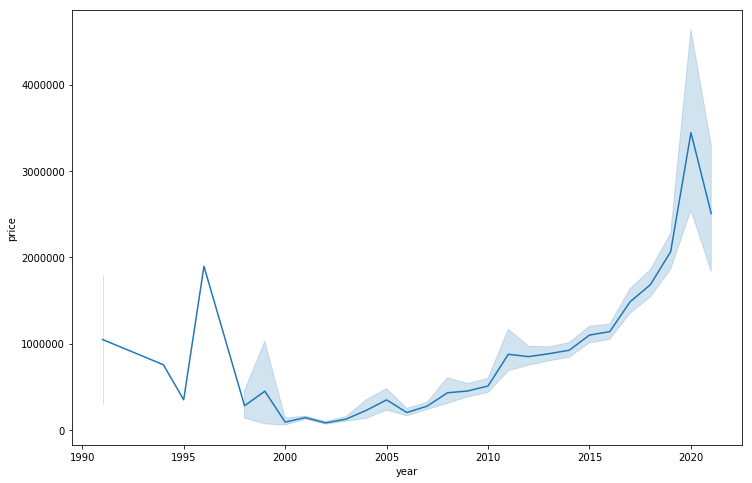

In [18]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'year', y = 'price', data = data, palette = 'Blues')

### From the below analysis, I can say that the hybrid cars we sold at higher prices followed by diesel cars

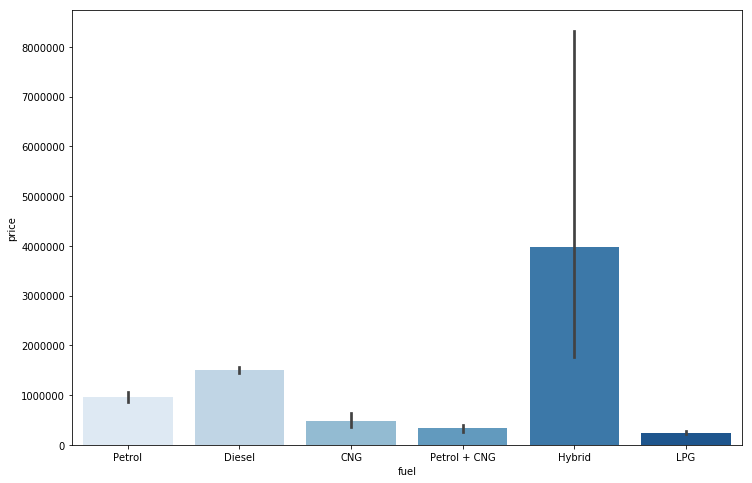

In [19]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'fuel', y = 'price', data = data, palette = 'Blues')

### Cars with Automatic Transmission were sold at higher prices

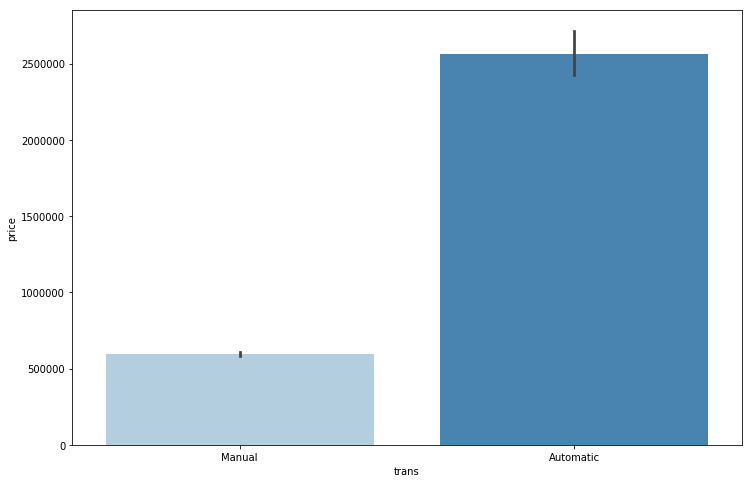

In [20]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'trans', y = 'price', data = data, palette = 'Blues')

### Miles on a car is inversly proportional, where the price decreases with increased miles in a car

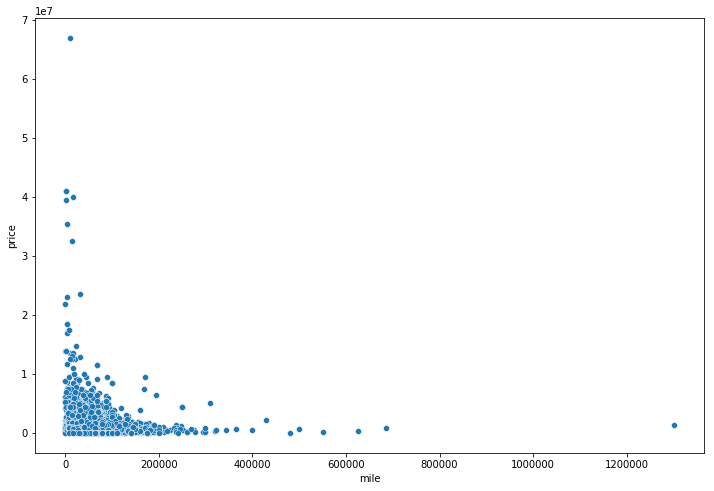

In [21]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'mile', y = 'price', data = data, palette = 'Blues')

### Used un-registered car was sold at higher prices followed by the cars with first owners

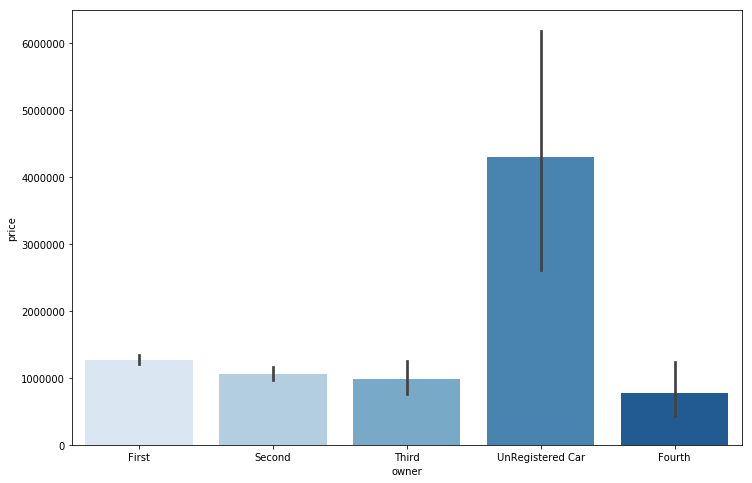

In [22]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'owner', y = 'price', data = data, palette = 'Blues')

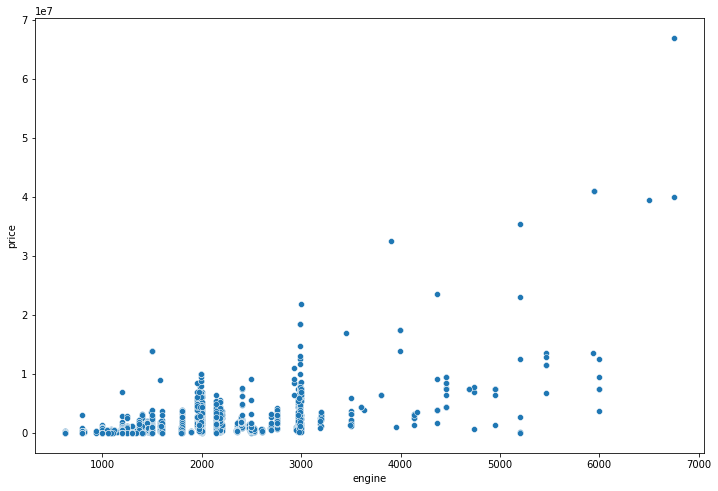

In [23]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'engine', y = 'price', data = data, palette = 'Blues')

### 2 seater cars were sold at higher prices when compared to other cars, ex. coupe's and convertibles

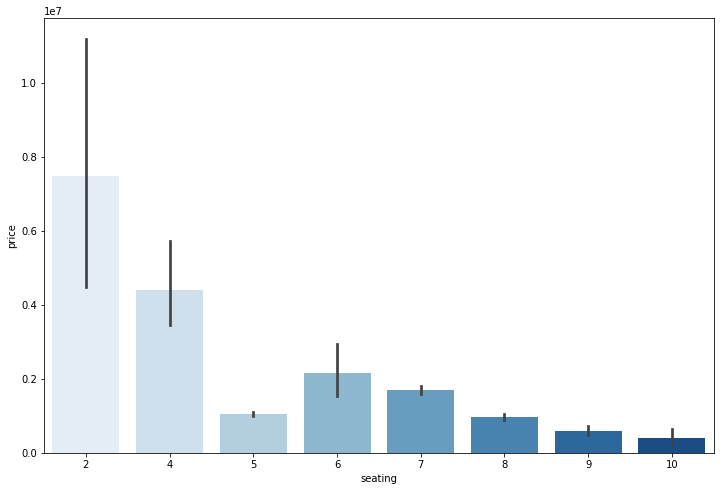

In [24]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'seating', y = 'price', data = data, palette = 'Blues')

## Cars at Mumbai, Delhi, kozhikode were sold at higher prices when compared to other cities

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

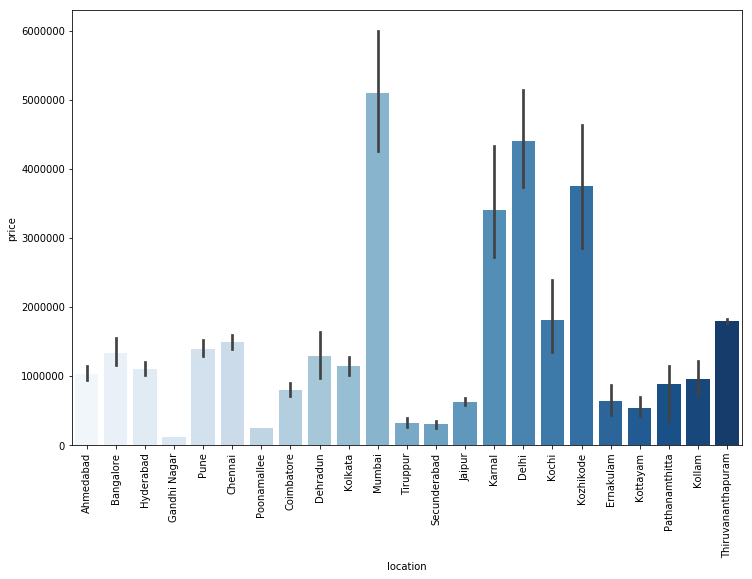

In [25]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'location', y = 'price', data = data, palette = 'Blues')
plt.xticks(rotation = 90)

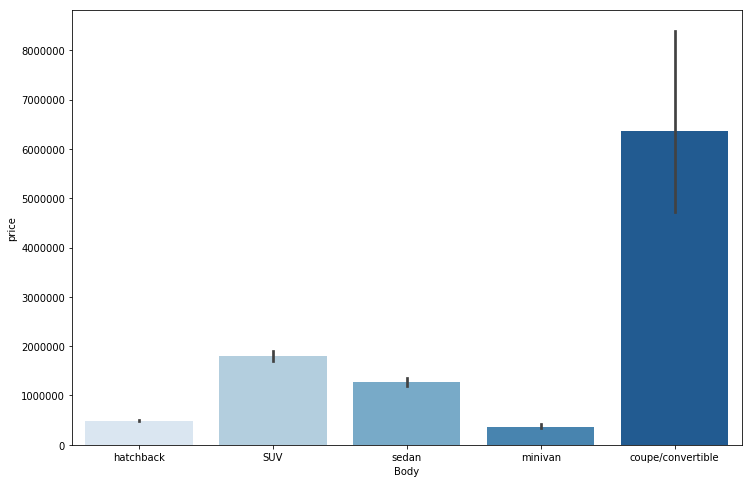

In [26]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'Body', y = 'price', data = data, palette = 'Blues')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]), <a list of 39 Text xticklabel objects>)

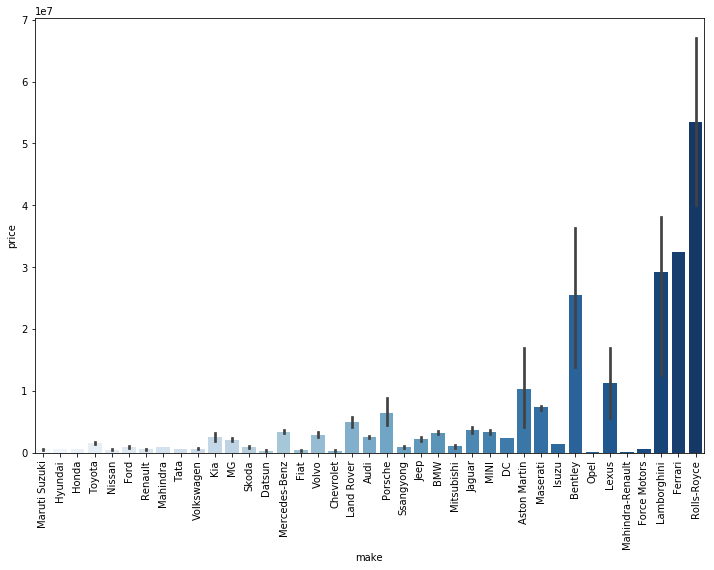

In [27]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'make', y = 'price', data = data, palette = 'Blues')
plt.xticks(rotation = 90)

### using binary encoder to encode the categorical data

In [28]:
be = BinaryEncoder()
enc_data = be.fit_transform(data[['fuel','trans','color','owner','location','Body','make','model']], return_df = True)

In [29]:
enc_data.head()

,fuel_0,fuel_1,fuel_2,fuel_3,trans_0,trans_1,color_0,color_1,color_2,color_3,...,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
dataset = pd.concat([data,enc_data], axis = 1)
dataset.head()

,price,year,fuel,trans,mile,color,owner,engine,seating,location,...,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9
0,422000.0,2019,Petrol,Manual,24230,White,First,998,5,Ahmedabad,...,0,0,0,0,0,0,0,0,0,1
1,585000.0,2018,Diesel,Manual,31694,White,First,1248,5,Ahmedabad,...,0,0,0,0,0,0,0,0,1,0
2,610000.0,2017,Petrol,Manual,49072,White,First,1197,5,Ahmedabad,...,0,0,0,0,0,0,0,0,1,1
3,399000.0,2013,Diesel,Manual,72301,White,First,1248,5,Ahmedabad,...,0,0,0,0,0,0,0,0,1,0
4,600000.0,2019,Petrol,Manual,21060,White,First,1197,5,Ahmedabad,...,0,0,0,0,0,0,0,0,1,0


### Dropping the categorical columns which were already encoded and joined in the dataset

In [31]:
dataset = dataset.drop(columns= ['fuel','trans','color','owner','location','Body','make','model'])

In [32]:
dataset.head()

,price,year,mile,engine,seating,fuel_0,fuel_1,fuel_2,fuel_3,trans_0,...,model_0,model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9
0,422000.0,2019,24230,998,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,585000.0,2018,31694,1248,5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,610000.0,2017,49072,1197,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,399000.0,2013,72301,1248,5,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,600000.0,2019,21060,1197,5,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### Checking for correlation in the dataset

In [33]:
corr_data = dataset.corr()
corr_data['price'].sort_values(ascending = False)

price         1.000000
engine        0.609159
make_1        0.493910
model_1       0.425324
trans_0       0.424015
make_2        0.328619
year          0.233362
make_4        0.196502
Body_2        0.181374
make_3        0.180000
Body_1        0.176818
model_2       0.164647
model_3       0.161236
fuel_2        0.120989
model_5       0.108403
color_9       0.104163
location_1    0.090874
owner_1       0.044015
model_6       0.023657
owner_3       0.022921
location_5    0.017361
color_8       0.011384
model_9       0.007610
model_4       0.002250
location_3   -0.007708
color_1      -0.009791
model_7      -0.010631
model_8      -0.015875
make_5       -0.017248
location_4   -0.017389
color_7      -0.017824
make_6       -0.027944
seating      -0.033450
color_2      -0.033903
fuel_1       -0.035002
owner_2      -0.042974
color_5      -0.046950
color_3      -0.049752
color_4      -0.067164
location_2   -0.077073
color_6      -0.078280
fuel_3       -0.118597
mile         -0.162956
Body_3     

### We can see that since we used binary encoder, there are some features which doesn't have any correlation with the target because the whole column consists of '0'. Therefore dropping the same.

In [34]:
dataset = dataset.drop(columns = ['fuel_0','color_0','owner_0','location_0','Body_0','make_0','model_0'])

### Finding the correlation coefficient and plotting the same using heatmap

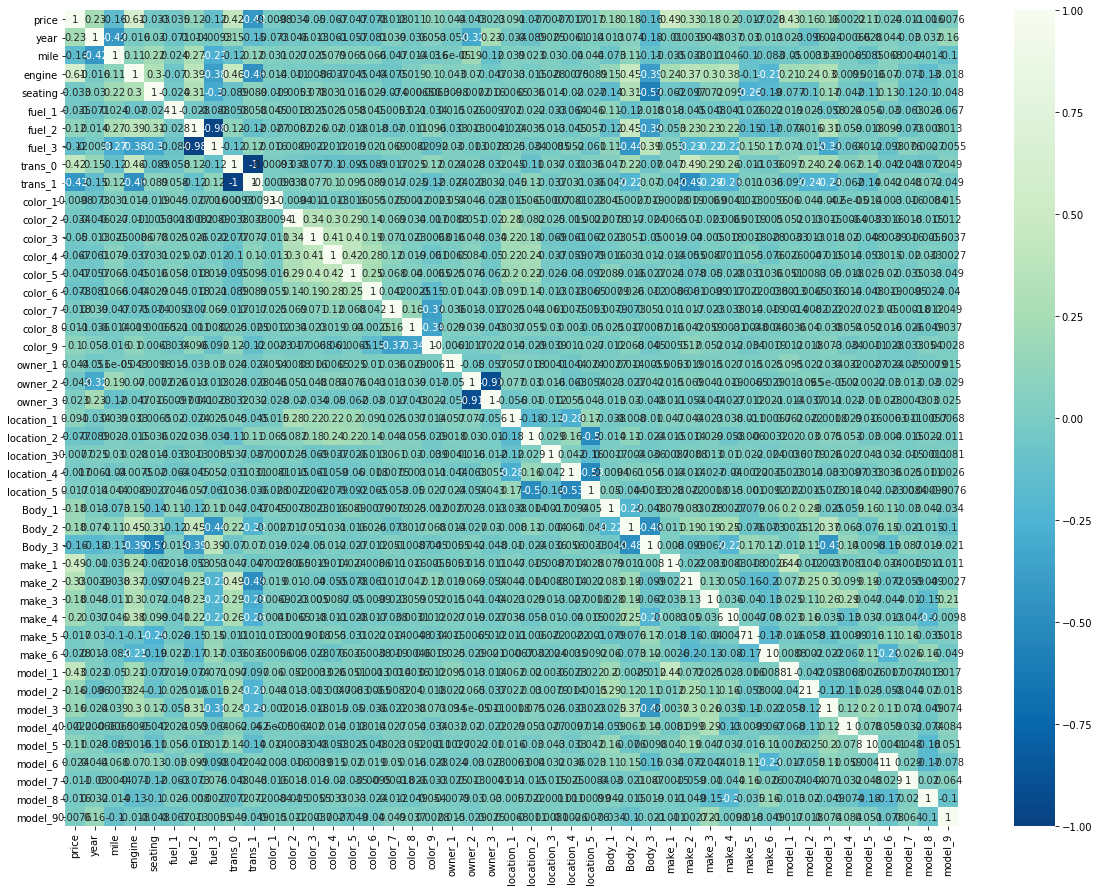

In [35]:
data_corr = dataset.corr()
plt.figure(figsize = (20,15))
sns.heatmap(data_corr, annot = True, cmap = 'GnBu_r')

### I can see that some of the columns in the dataset show multi-collinearity. We will ignore the same as it will not affect the prediction

### Checking for outliers using boxplot

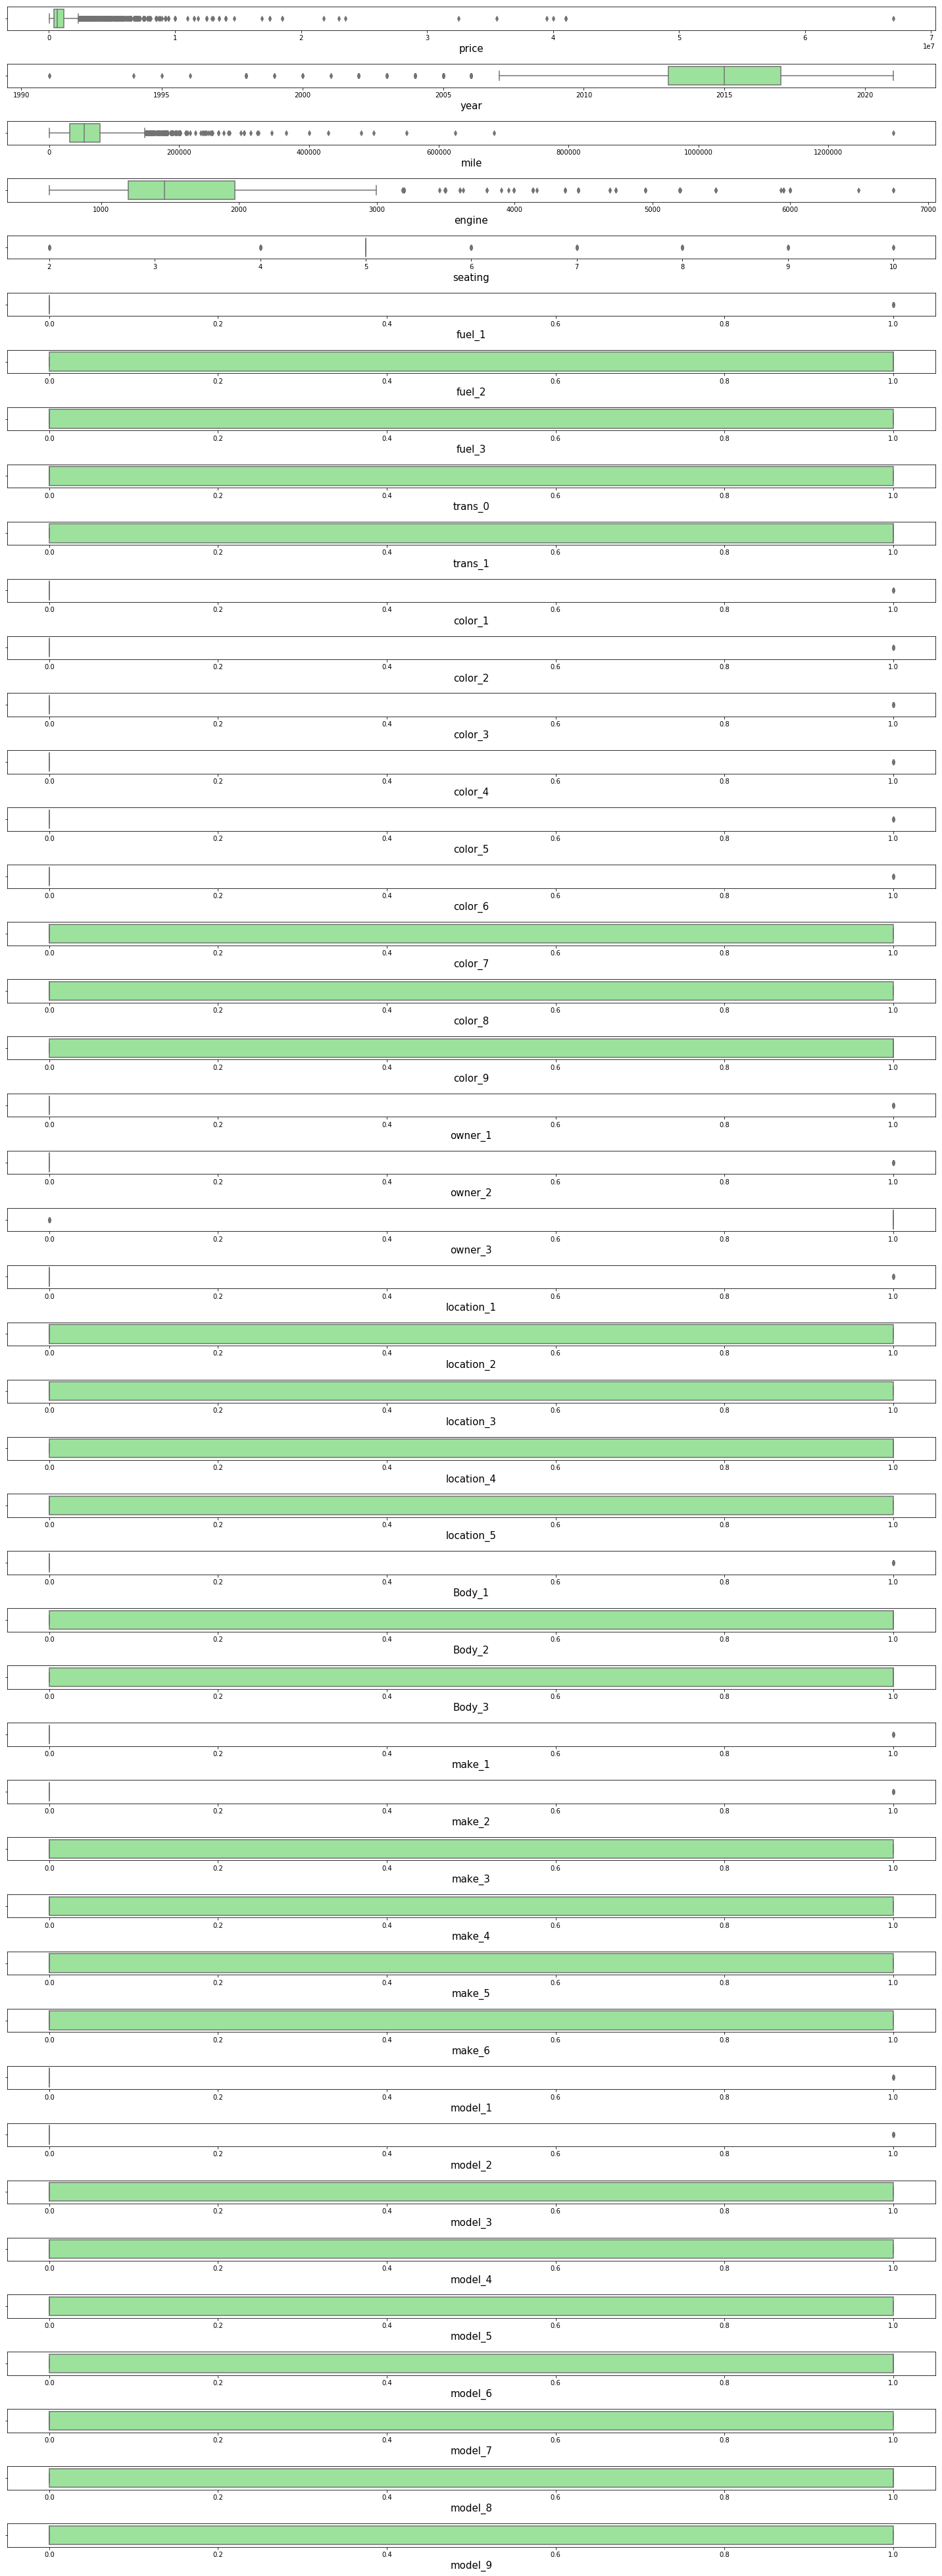

In [36]:
plt.figure(figsize = (20,60))
pltnum = 1

for i in dataset:
    if pltnum <=50:
        plt.subplot(50,1,pltnum)
        sns.boxplot(dataset[i],color = 'lightgreen')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

### Removing the outliers using zscore method

In [37]:
from scipy.stats import zscore
z = np.abs(zscore(dataset[['mile','engine']]))
z.head()

,mile,engine
0,0.807877,0.977306
1,0.636684,0.586068
2,0.238105,0.665880
3,0.294672,0.586068
4,0.880584,0.665880


In [38]:
new_data = dataset[(z<2.1).all(axis = 1)]
print(dataset.shape)
print(new_data.shape)

(6591, 45)
(6067, 45)


### Checking for data distribution only on continuous data variables

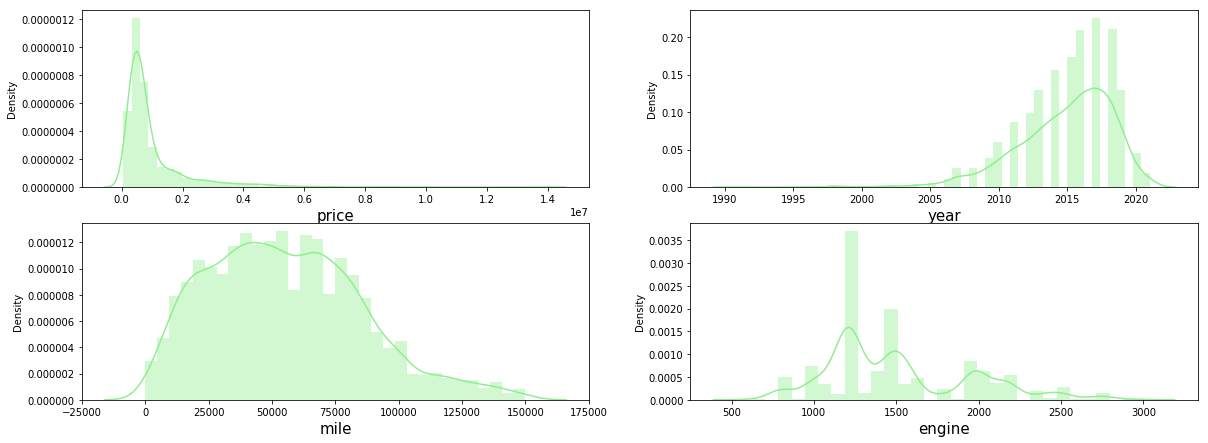

In [39]:
plt.figure(figsize = (20,15))
pltnum = 1

for i in new_data:
    if pltnum <=4:
        plt.subplot(4,2,pltnum)
        sns.distplot(new_data[i],color = 'lightgreen')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.show()

### We can see that the columns are skewed, hence using cuberoot transformation to handle the skewness

In [40]:
x = new_data.drop(columns= 'price')
y = new_data['price']

In [41]:
x.skew()

year          -1.086255
mile           0.512053
engine         0.794256
seating        2.140643
fuel_1         8.537383
fuel_2        -0.078868
fuel_3         0.087463
trans_0        0.898188
trans_1       -0.898188
color_1       21.538891
color_2        5.367602
color_3        4.318395
color_4        3.622595
color_5        2.930888
color_6        1.800759
color_7        0.709119
color_8        0.267804
color_9       -0.285444
owner_1       10.362014
owner_2        1.561464
owner_3       -1.692777
location_1     3.255366
location_2     0.979982
location_3     0.691081
location_4    -0.641657
location_5     0.296332
Body_1         7.156380
Body_2        -0.492743
Body_3        -0.819980
make_1        31.759509
make_2         2.224353
make_3         1.097921
make_4         1.020534
make_5         0.004946
make_6        -0.053106
model_1       15.485565
model_2        1.876763
model_3        0.986368
model_4        0.456943
model_5        0.342906
model_6       -0.085479
model_7        0

In [42]:
x = np.cbrt(x)

In [43]:
x.skew()

year          -1.091542
mile          -0.606210
engine         0.401242
seating        1.770393
fuel_1         8.537383
fuel_2        -0.078868
fuel_3         0.087463
trans_0        0.898188
trans_1       -0.898188
color_1       21.538891
color_2        5.367602
color_3        4.318395
color_4        3.622595
color_5        2.930888
color_6        1.800759
color_7        0.709119
color_8        0.267804
color_9       -0.285444
owner_1       10.362014
owner_2        1.561464
owner_3       -1.692777
location_1     3.255366
location_2     0.979982
location_3     0.691081
location_4    -0.641657
location_5     0.296332
Body_1         7.156380
Body_2        -0.492743
Body_3        -0.819980
make_1        31.759509
make_2         2.224353
make_3         1.097921
make_4         1.020534
make_5         0.004946
make_6        -0.053106
model_1       15.485565
model_2        1.876763
model_3        0.986368
model_4        0.456943
model_5        0.342906
model_6       -0.085479
model_7        0

### Skewness is handled and we can view the same from the below figures

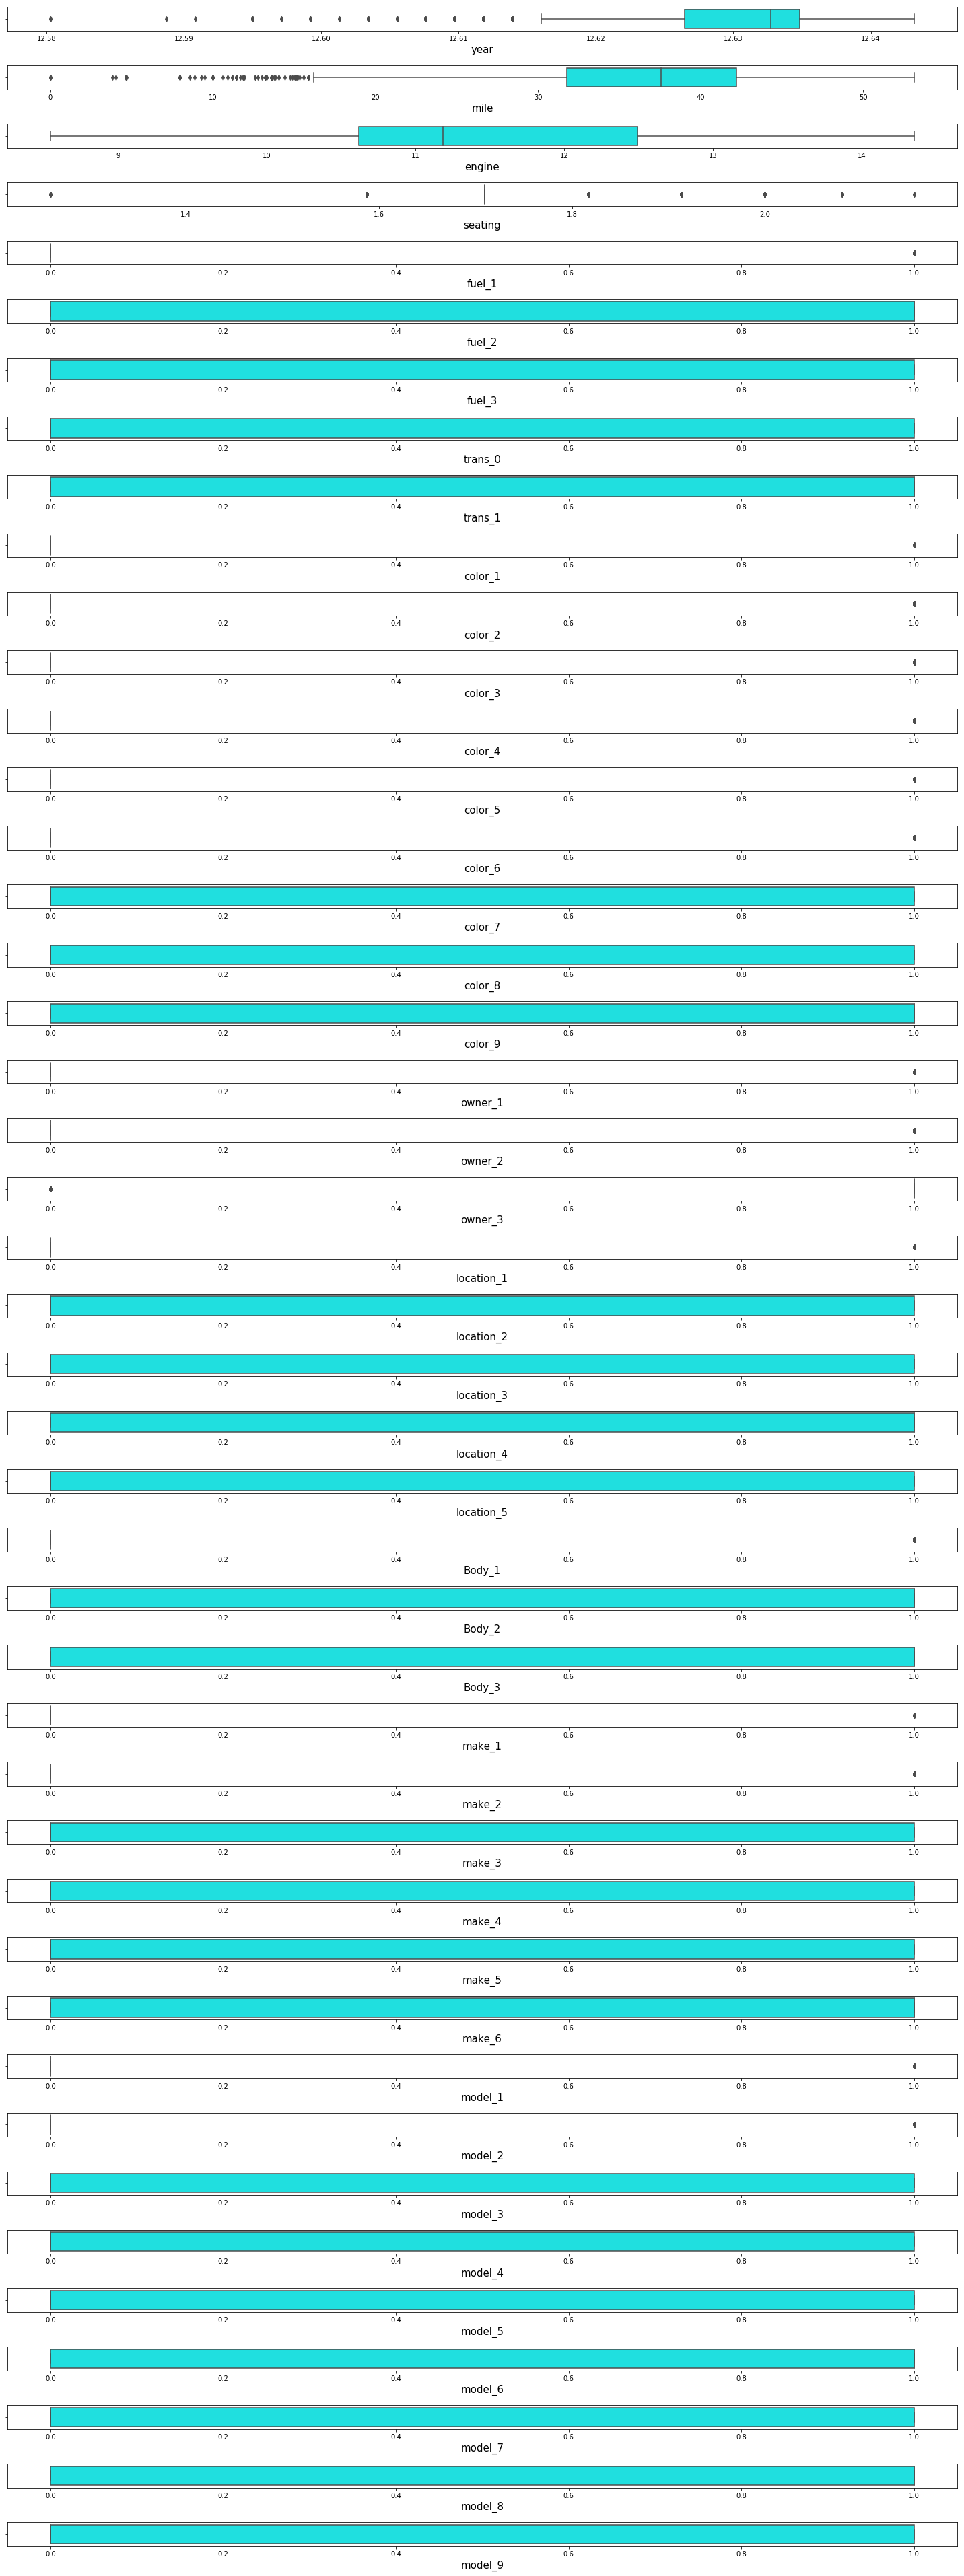

In [44]:
plt.figure(figsize = (20,60))
pltnum = 1

for i in x:
    if pltnum <=50:
        plt.subplot(50,1,pltnum)
        sns.boxplot(x[i],color = 'cyan')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

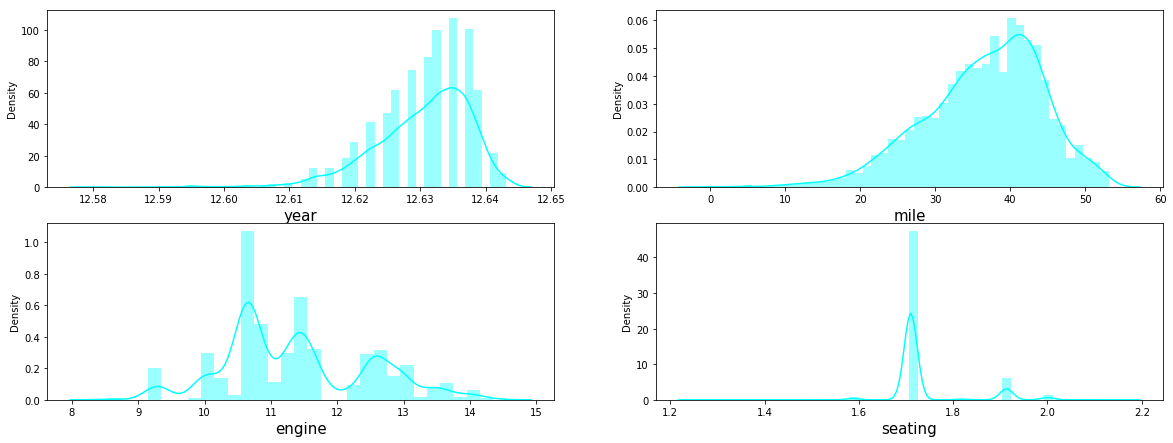

In [45]:
plt.figure(figsize = (20,15))
pltnum = 1

for i in x:
    if pltnum <=4:
        plt.subplot(4,2,pltnum)
        sns.distplot(x[i],color = 'cyan')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.show()

### Finding the best random state using a for loop to split the data

In [46]:
from sklearn.linear_model import LinearRegression
rs = 0
for i in range(0,2000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = i, test_size = 0.3)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    tr_score = lr.score(x_train,y_train)
    ts_score = lr.score(x_test,y_test)
    if round(tr_score*100,1) == round(ts_score*100,1):
        if i> rs:
            rs = i
print('the best random state is', rs)

the best random state is 1975


In [47]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = rs)

### Model 1: Linear Regression

In [48]:
lin = LinearRegression()
lin.fit(x_train,y_train)
lin_pred = lin.predict(x_test)
lin_score = lin.score(x_test,y_test)
lin_score

0.6497054776469693

In [49]:
from sklearn.metrics import mean_squared_error
lin_rmse = np.sqrt(mean_squared_error(y_test,lin_pred))
print('RMSE for Linear Regression: ', lin_rmse)

RMSE for Linear Regression:  692726.9642558749


### Visualizing the predicted V/S actual price

Text(0, 0.5, 'Predicted')

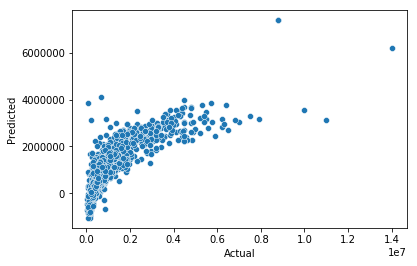

In [50]:
plt.figure()
sns.scatterplot(y_test, lin_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Model 2: Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
rfr_score = rfr.score(x_test,y_test)
print('The r2 for the Random Forest Regression is' , rfr_score)

The r2 for the Random Forest Regression is 0.9268305365406163


In [76]:
rfr_rmse = np.sqrt(mean_squared_error(y_test,rfr_pred))
print('RMSE for Random Forest Regression: ', rfr_rmse)

RMSE for Random Forest Regression:  316599.59495493484


Text(0, 0.5, 'Predicted')

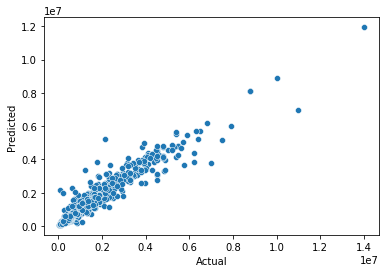

In [53]:
plt.figure()
sns.scatterplot(y_test, rfr_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Model 3: Extra Trees Regressor

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred = et.predict(x_test)
et_score = et.score(x_test,y_test)
print('The r2 for the Extra Trees Regression is' , et_score)

The r2 for the Extra Trees Regression is 0.9413955228687255


In [77]:
et_rmse = np.sqrt(mean_squared_error(y_test,et_pred))
print('RMSE for Extra Trees Regression: ', et_rmse)

RMSE for Extra Trees Regression:  283341.9102025325


Text(0, 0.5, 'Predicted')

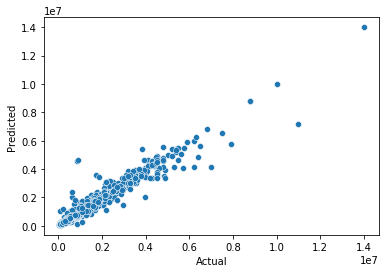

In [56]:
plt.figure()
sns.scatterplot(y_test, et_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Model 4: XGB Regressor

In [57]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
xgb_score = xgb.score(x_test,y_test)
print('The r2 for the XGB Regression is' , xgb_score)

The r2 for the XGB Regression is 0.9474470378211802


In [78]:
xgb_rmse = np.sqrt(mean_squared_error(y_test,xgb_pred))
print('RMSE for XG Boost Regression: ', xgb_rmse)

RMSE for XG Boost Regression:  268314.42389258975


Text(0, 0.5, 'Predicted')

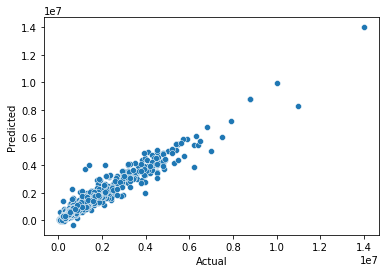

In [59]:
plt.figure()
sns.scatterplot(y_test, xgb_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

### Checking for overfitting using the cross val score

In [60]:
cv = cross_val_score(lin,x,y,scoring = 'r2', cv = 5)
cv = cv.mean()
cv

0.5986767679991206

In [61]:
cv1 = cross_val_score(rfr,x,y,scoring = 'r2', cv = 5)
cv1 = cv1.mean()
cv1

0.8255794683669093

In [62]:
cv2 = cross_val_score(et,x,y,scoring = 'r2', cv = 5)
cv2 = cv2.mean()
cv2

0.8731298419181431

In [63]:
cv3 = cross_val_score(xgb,x,y,scoring = 'r2', cv = 5)
cv3 = cv3.mean()
cv3

0.846205796177989

### Selecting the best model to perform hyper parameter tuning

In [64]:
ml = [lin_score, rfr_score,et_score, xgb_score]
cv = [cv,cv1,cv2,cv3]
rmse = [lin_rmse, rfr_rmse, et_rmse, xgb_rmse]
model = pd.DataFrame({})
model['ml'] = ml
model['cv'] =cv
model['rmse'] = rmse
model['diff'] = model['ml'] - model['cv']
model

,ml,cv,rmse,diff
0,0.649705,0.598677,692726.964256,0.051029
1,0.926831,0.825579,316599.594955,0.101251
2,0.941396,0.873130,283341.910203,0.068266
3,0.947447,0.846206,268314.423893,0.101241


### Extra Trees Regressor is the best model

### Hyper Parameter Tuning

In [72]:
params = {'n_estimators':[100,200,300,400],
         'max_depth':[3,5,7,9],
         'min_samples_split':[2,3,4,5,6],
         'bootstrap':[True,False]}

In [73]:
gcv = GridSearchCV(ExtraTreesRegressor(),params, cv = 5, n_jobs = -1)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 5, 7, 9],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400]})

In [74]:
gcv.best_params_

{'bootstrap': False,
 'max_depth': 9,
 'min_samples_split': 2,
 'n_estimators': 200}

### Final Model

In [75]:
final = ExtraTreesRegressor(max_depth =9, bootstrap = False, min_samples_split = 2, n_estimators = 200)
final.fit(x_train,y_train)
fn_pred = final.predict(x_test)
fn_score = final.score(x_test,y_test)
fn_score

0.9248627498703242

In [79]:
fn_rmse = np.sqrt(mean_squared_error(y_test,fn_pred))
print('RMSE for Hyper Tuned Extra Trees Regression: ', fn_rmse)

RMSE for Hyper Tuned Extra Trees Regression:  320828.59401267767


Text(0, 0.5, 'Predicted')

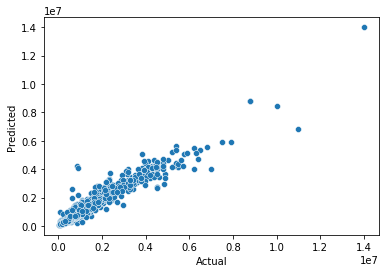

In [80]:
plt.figure()
sns.scatterplot(y_test, fn_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [81]:
import joblib
joblib.dump(final,'car_price.pkl')

['car_price.pkl']